In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Zenka - dosu arashi,1969
1,Not My Sister,1916
2,Salvage,2017
3,Ikaw kasi,1955
4,Mistress,2018


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [5]:
cast['decade'] = (cast['year'] // 10 * 10)

In [6]:
cast.head()

,title,year,name,type,character,n,decade
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010


<AxesSubplot:xlabel='decade'>

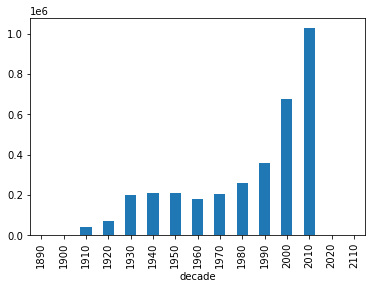

In [9]:
cast.groupby('decade').size().plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

<AxesSubplot:xlabel='decade'>

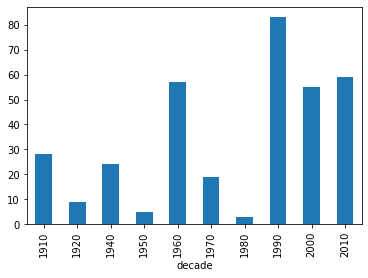

In [13]:
cast[cast['title'] == 'Hamlet'].groupby('decade').size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [16]:
cast[(cast['n'] == 1.0) & (cast['decade'] == 1950)].groupby('type').size()

type
actor      6482
actress    2985
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [21]:
cast[(cast['n'] <= 5.0) & (cast['decade'] == 1950)].groupby(['type','n']).size().unstack(0)

type,actor,actress
n,,
1.0,6482,2985
2.0,4520,4496
3.0,5489,3109
4.0,5479,2820
5.0,5493,2531


### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [26]:
cast[cast['title'] == 'The Pink Panther'].groupby('year').max('n')

,n,decade
year,,
1963,15.0,1960
2006,50.0,2000


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [29]:
cast[(cast['name'] == 'Frank Oz') & (cast['n'] > 1)].groupby(['year','title']).size()

year  title                                         
1979  The Muppet Movie                                  8
1980  Star Wars: Episode V - The Empire Strikes Back    1
      The Blues Brothers                                1
1981  The Great Muppet Caper                            6
1982  The Dark Crystal                                  2
1983  Star Wars: Episode VI - Return of the Jedi        1
      Trading Places                                    1
1984  The Muppets Take Manhattan                        7
1985  Follow That Bird                                  3
      Spies Like Us                                     1
1986  Labyrinth                                         1
1992  The Muppet Christmas Carol                        7
1996  Muppet Treasure Island                            4
1998  Blues Brothers 2000                               1
1999  Muppets from Space                                4
      Star Wars: Episode I - The Phantom Menace         1
      The Adventure

### List each of the characters that Frank Oz has portrayed at least twice.

In [32]:
frank = cast[(cast['name'] == 'Frank Oz')].groupby('character').size()

In [37]:
frank[frank >= 2].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Miss Piggy        5
Sam the Eagle     5
Animal            6
Yoda              6
dtype: int64